# Spotify Tracks Linear Regression Analysis

## Project Overview
This notebook performs linear regression modeling on the Spotify Tracks Dataset to predict track popularity based on various audio features and metadata.

**Dataset**: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data)

**Features Used**:
- Audio Features: Danceability, Energy, Valence, Tempo, Loudness, Duration_min
- Metadata: Explicit

**Target Variable**: Popularity (0-100 score)

## 1. Import Libraries

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Dataset

In [6]:
# Load the dataset
# NOTE: Update the path to where you've saved the dataset
df = pd.read_csv('../data/row_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nNumber of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (114000, 21)

Number of rows: 114,000
Number of columns: 21


In [7]:
# Display first few rows
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [4]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [15]:
# Statistical summary
df.describe()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,3.800486
std,32909.109681,22.305078,1.072977e+05,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,1.788295
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,2.901100
50%,56999.500000,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,3.548433
75%,85499.250000,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,4.358433
max,113999.000000,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250


## 3. Data Preprocessing

In [16]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
dtype: int64

Total missing values: 3


In [13]:
# Select the features for modeling
feature_columns = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'duration_ms', 'explicit']
target_column = 'popularity'

# Check if duration_min exists, if not create it from duration_ms
if 'duration_min' not in df.columns and 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000
    print("Created 'duration_min' from 'duration_ms'")

# Update feature columns to use duration_min
if 'duration_min' in df.columns:
    feature_columns = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'duration_min', 'explicit']

# Convert explicit to binary if it's boolean
if df['explicit'].dtype == 'bool':
    df['explicit'] = df['explicit'].astype(int)

print(f"\nFeatures selected: {feature_columns}")
print(f"Target variable: {target_column}")

Created 'duration_min' from 'duration_ms'

Features selected: ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'duration_min', 'explicit']
Target variable: popularity


In [17]:
# Create a clean dataset with only the required columns
columns_needed = feature_columns + [target_column]
df_clean = df[columns_needed].copy()

# Remove rows with missing values in selected columns
df_clean = df_clean.dropna()

print(f"Clean dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]:,}")

Clean dataset shape: (114000, 8)
Rows removed: 0


In [18]:
# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Duplicates removed. New shape: {df_clean.shape}")

Number of duplicate rows: 27294
Duplicates removed. New shape: (86706, 8)


## 4. Exploratory Data Analysis (EDA)

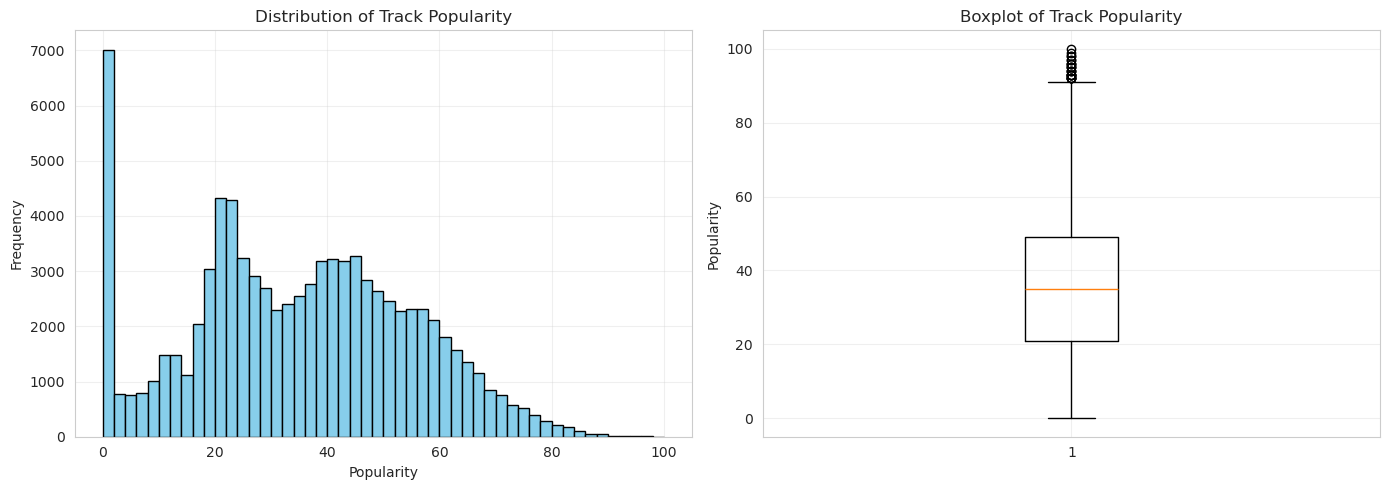

Popularity Statistics:
count    86706.000000
mean        34.632528
std         19.853470
min          0.000000
25%         21.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64


In [19]:
# Distribution of the target variable (Popularity)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['popularity'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['popularity'], vert=True)
plt.ylabel('Popularity')
plt.title('Boxplot of Track Popularity')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Popularity Statistics:")
print(df_clean['popularity'].describe())

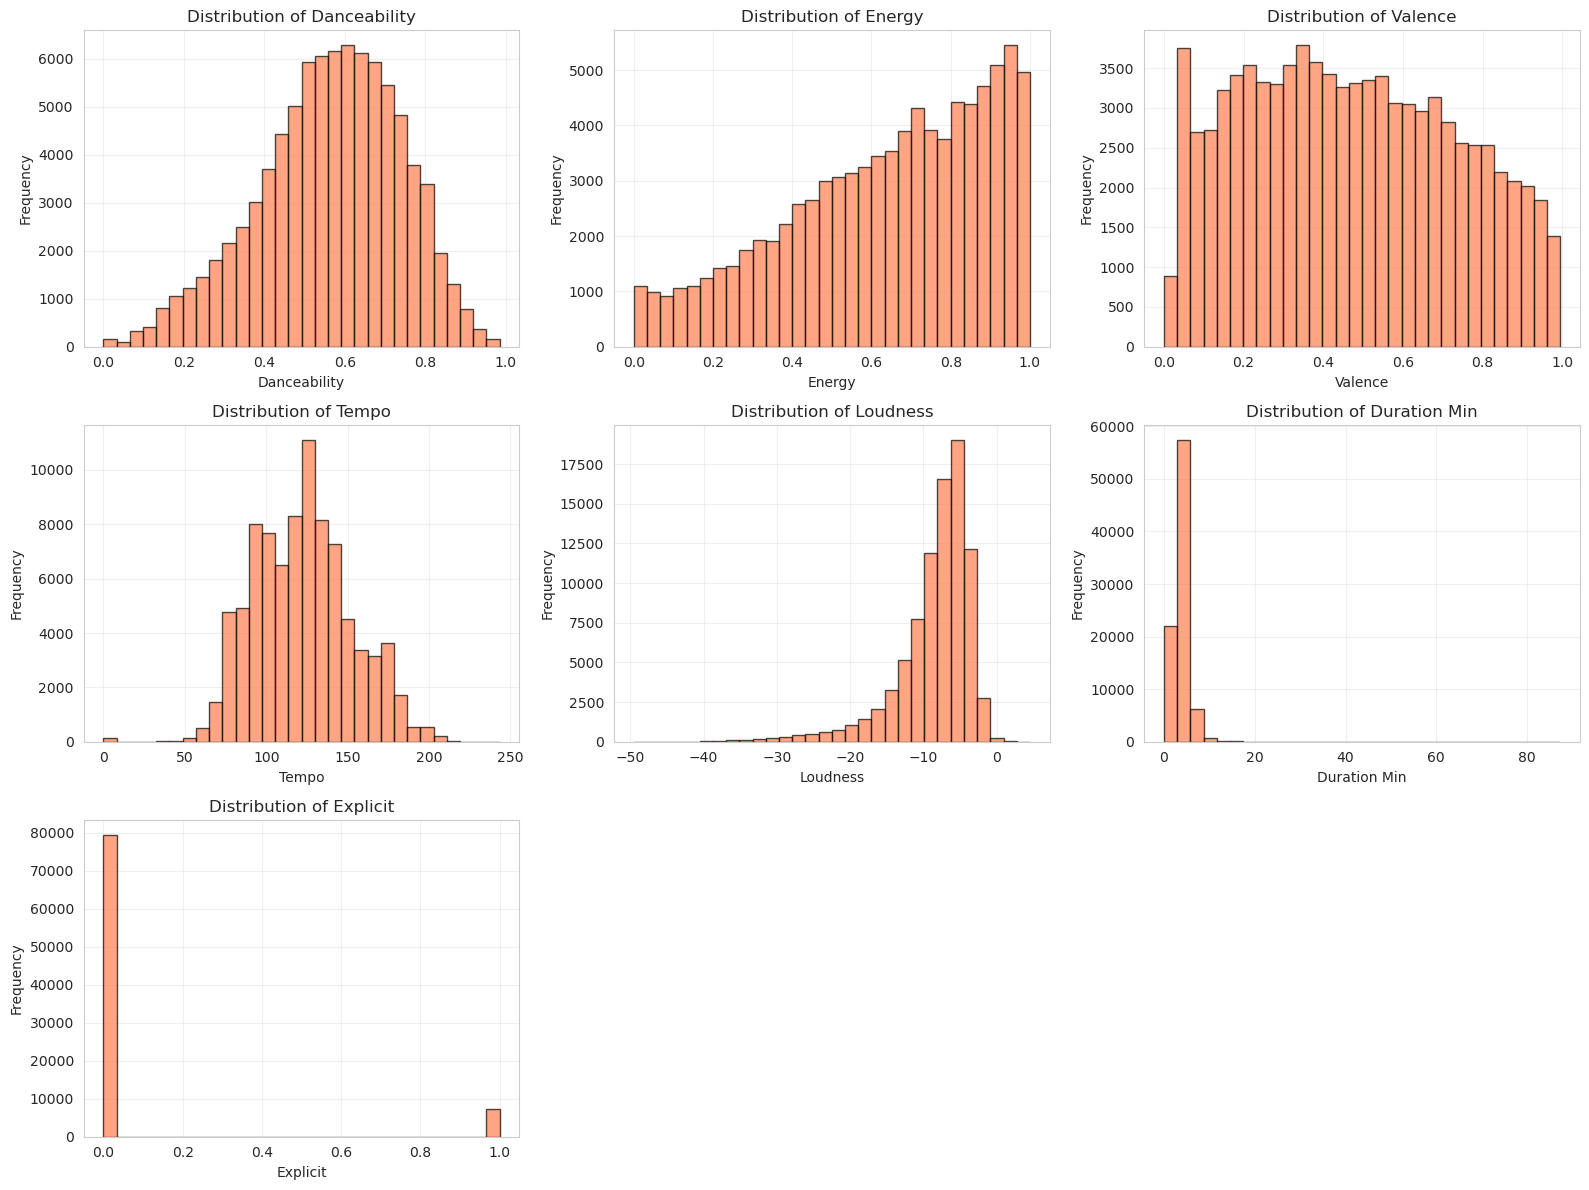

In [20]:
# Distribution of features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    axes[idx].hist(df_clean[col], bins=30, edgecolor='black', color='coral', alpha=0.7)
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[idx].grid(alpha=0.3)

# Hide extra subplots if any
for idx in range(len(feature_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

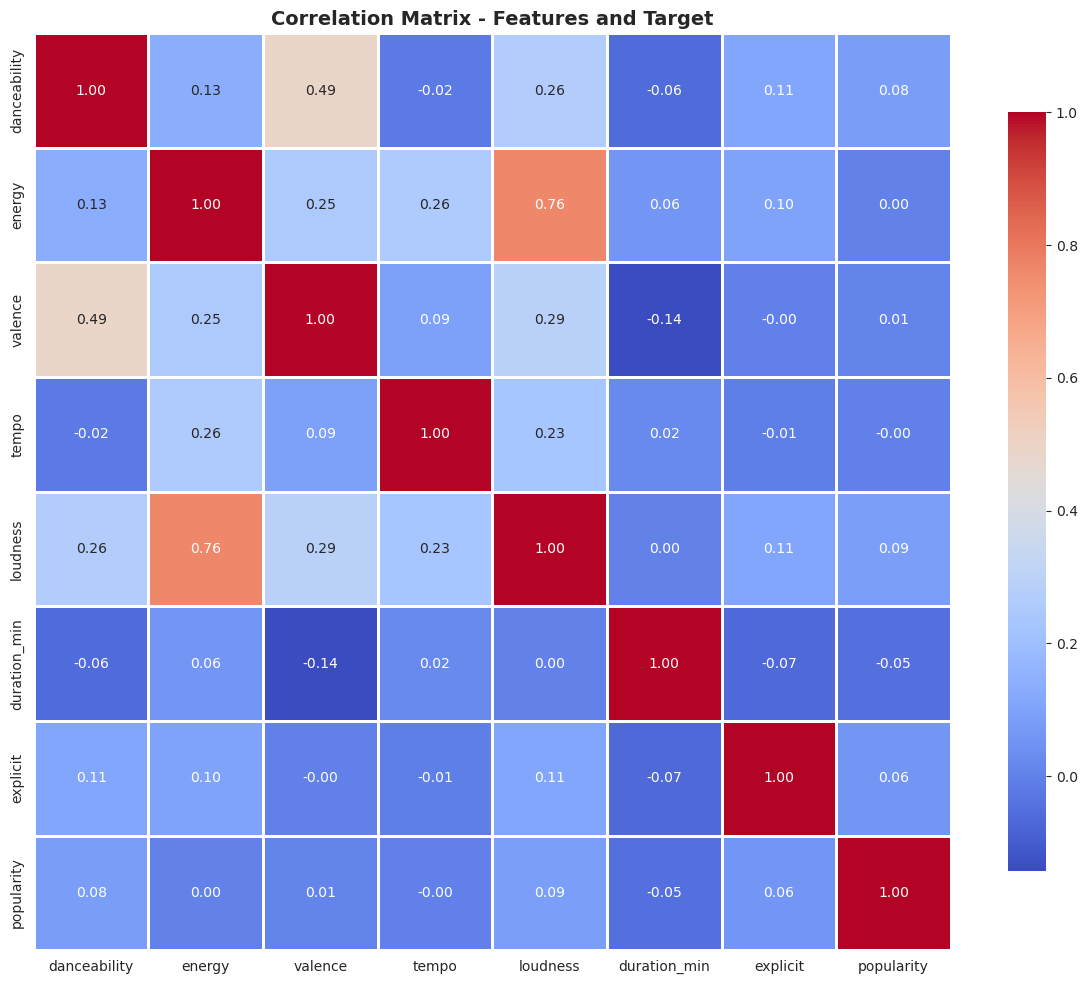


Correlation with Popularity (sorted):
popularity      1.000000
loudness        0.086956
danceability    0.080713
explicit        0.060668
valence         0.008391
energy          0.002353
tempo          -0.000141
duration_min   -0.047529
Name: popularity, dtype: float64


In [22]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Features and Target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Popularity (sorted):")
print(correlation_matrix['popularity'].sort_values(ascending=False))

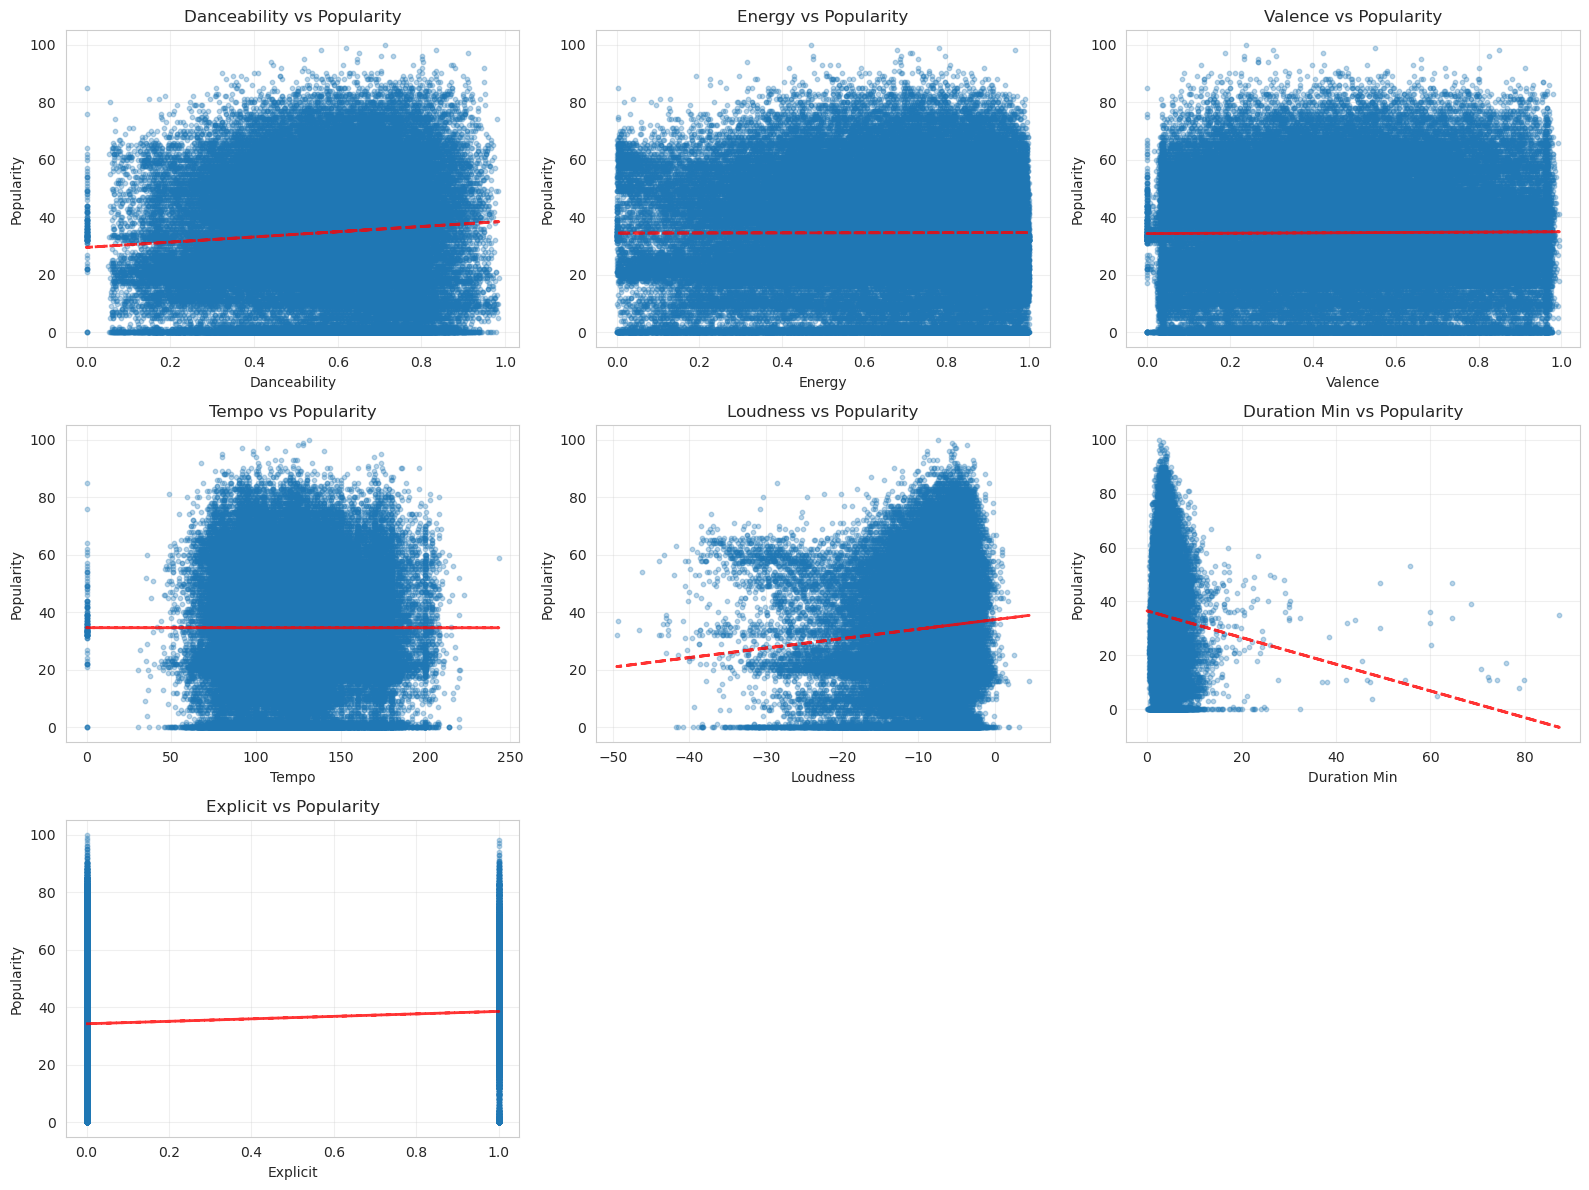

In [23]:
# Scatter plots of features vs popularity
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    axes[idx].scatter(df_clean[col], df_clean['popularity'], alpha=0.3, s=10)
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Popularity')
    axes[idx].set_title(f'{col.replace("_", " ").title()} vs Popularity')
    axes[idx].grid(alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df_clean[col], df_clean['popularity'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_clean[col], p(df_clean[col]), "r--", alpha=0.8, linewidth=2)

# Hide extra subplots
for idx in range(len(feature_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

Using a sample of 5000 rows for pairplot visualization


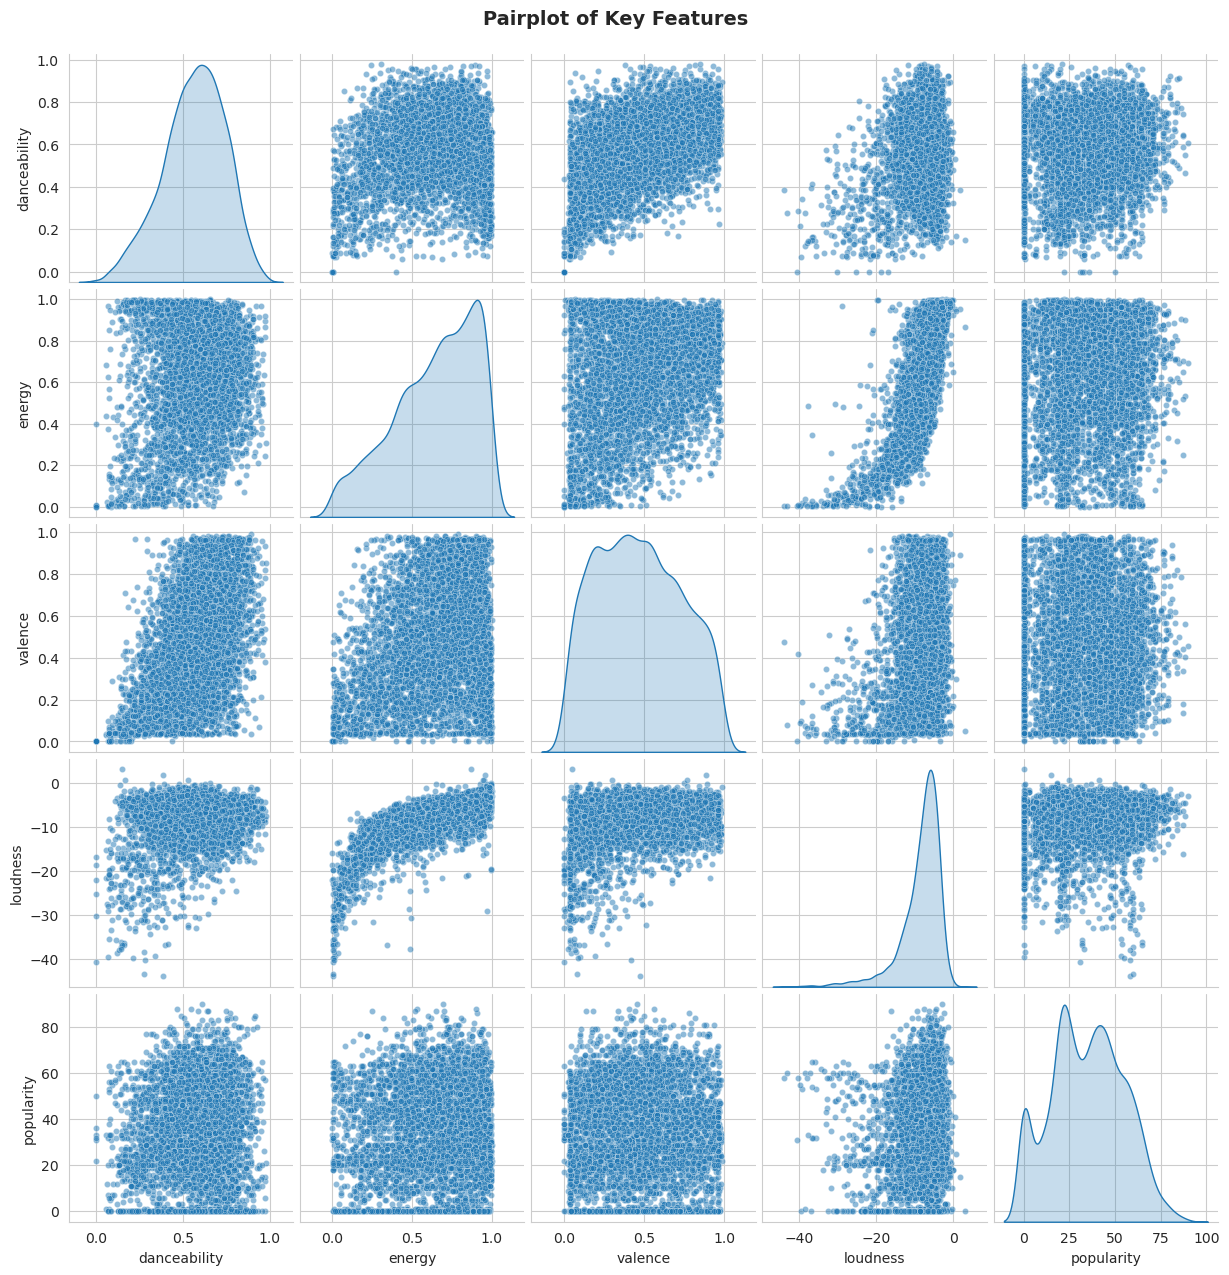

In [24]:
# Pairplot for key features (sample for performance)
if len(df_clean) > 5000:
    sample_df = df_clean.sample(n=5000, random_state=42)
    print("Using a sample of 5000 rows for pairplot visualization")
else:
    sample_df = df_clean

# Select a subset of features for pairplot
key_features = ['danceability', 'energy', 'valence', 'loudness', 'popularity']
sns.pairplot(sample_df[key_features], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

## 5. Feature Engineering and Preparation

In [27]:
# Separate features and target
X = df_clean[feature_columns]
y = df_clean[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns:")
print(X.columns.tolist())

Features shape: (86706, 7)
Target shape: (86706,)

Feature columns:
['danceability', 'energy', 'valence', 'tempo', 'loudness', 'duration_min', 'explicit']


In [29]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set size: 69,364 (80.0%)
Testing set size: 17,342 (20.0%)


In [30]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features have been standardized (scaled)")
print(f"\nScaling parameters:")
print(f"Mean: {scaler.mean_}")
print(f"Std: {scaler.scale_}")

Features have been standardized (scaled)

Scaling parameters:
Mean: [ 5.61393698e-01  6.36326604e-01  4.66996140e-01  1.22182858e+02
 -8.51842774e+00  3.83970548e+00  8.50152817e-02]
Std: [ 0.17657179  0.25683792  0.26277234 30.13006892  5.22315455  1.86936862
  0.27890443]


## 6. Linear Regression Model Building

In [31]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print(f"\nModel Intercept: {lr_model.intercept_:.4f}")
print(f"\nModel Coefficients:")
for feature, coef in zip(feature_columns, lr_model.coef_):
    print(f"  {feature:15s}: {coef:8.4f}")

Linear Regression model trained successfully!

Model Intercept: 34.6587

Model Coefficients:
  danceability   :   1.3324
  energy         :  -2.5732
  valence        :  -0.9138
  tempo          :   0.0331
  loudness       :   3.5104
  duration_min   :  -0.7640
  explicit       :   0.8899


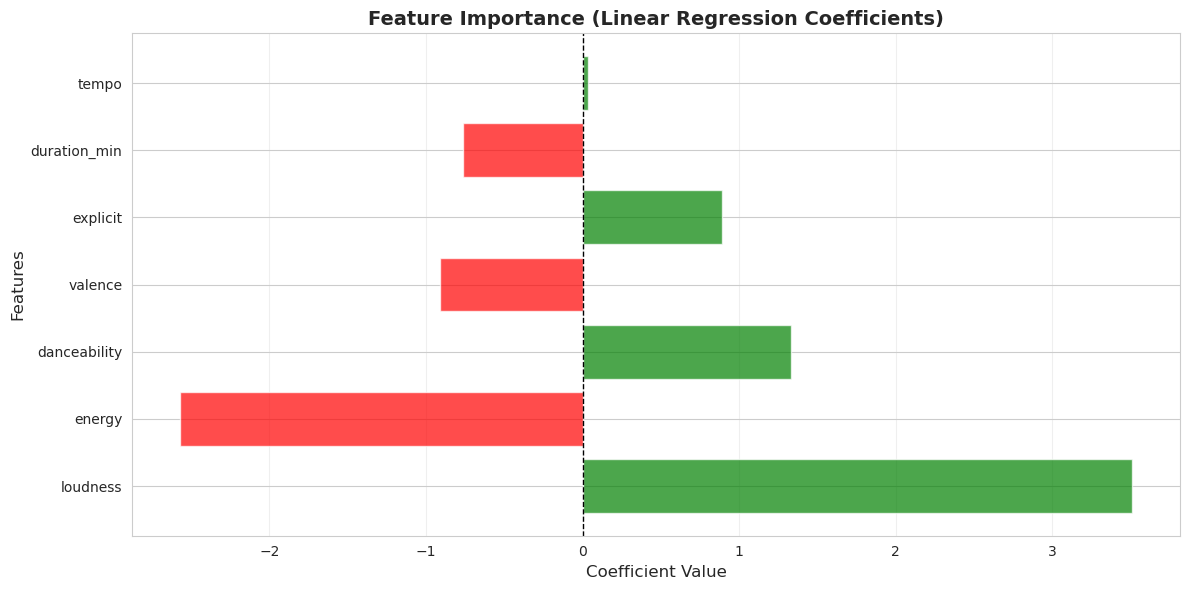

In [32]:
# Visualize feature importance (coefficients)
plt.figure(figsize=(12, 6))
coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Model Predictions

In [33]:
# Make predictions on training and testing sets
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

print("Predictions generated successfully!")
print(f"\nSample predictions (first 10 test samples):")
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_test_pred[:10],
    'Difference': y_test.values[:10] - y_test_pred[:10]
}).round(2)
print(comparison_df)

Predictions generated successfully!

Sample predictions (first 10 test samples):
   Actual  Predicted  Difference
0      21      34.95      -13.95
1      28      33.41       -5.41
2      45      34.17       10.83
3      21      37.96      -16.96
4      49      34.30       14.70
5      34      33.85        0.15
6      60      35.69       24.31
7      50      34.21       15.79
8      67      37.45       29.55
9      32      30.51        1.49


## 8. Model Validation and Evaluation

In [34]:
# Calculate evaluation metrics
# Training set metrics
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Testing set metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display metrics
print("="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)
print(f"\n{'Metric':<25} {'Training Set':<20} {'Testing Set':<20}")
print("-"*60)
print(f"{'R² Score':<25} {train_r2:<20.4f} {test_r2:<20.4f}")
print(f"{'Mean Squared Error':<25} {train_mse:<20.4f} {test_mse:<20.4f}")
print(f"{'Root Mean Squared Error':<25} {train_rmse:<20.4f} {test_rmse:<20.4f}")
print(f"{'Mean Absolute Error':<25} {train_mae:<20.4f} {test_mae:<20.4f}")
print("="*60)

MODEL PERFORMANCE METRICS

Metric                    Training Set         Testing Set         
------------------------------------------------------------
R² Score                  0.0245               0.0262              
Mean Squared Error        383.8401             386.4263            
Root Mean Squared Error   19.5918              19.6577             
Mean Absolute Error       16.1928              16.2857             


In [35]:
# Cross-validation
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, 
                            scoring='r2')

print("\n5-Fold Cross-Validation Results:")
print("-"*40)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: R² = {score:.4f}")
print("-"*40)
print(f"Mean R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Min R² Score: {cv_scores.min():.4f}")
print(f"Max R² Score: {cv_scores.max():.4f}")


5-Fold Cross-Validation Results:
----------------------------------------
Fold 1: R² = 0.0234
Fold 2: R² = 0.0262
Fold 3: R² = 0.0223
Fold 4: R² = 0.0244
Fold 5: R² = 0.0246
----------------------------------------
Mean R² Score: 0.0242 (+/- 0.0026)
Min R² Score: 0.0223
Max R² Score: 0.0262


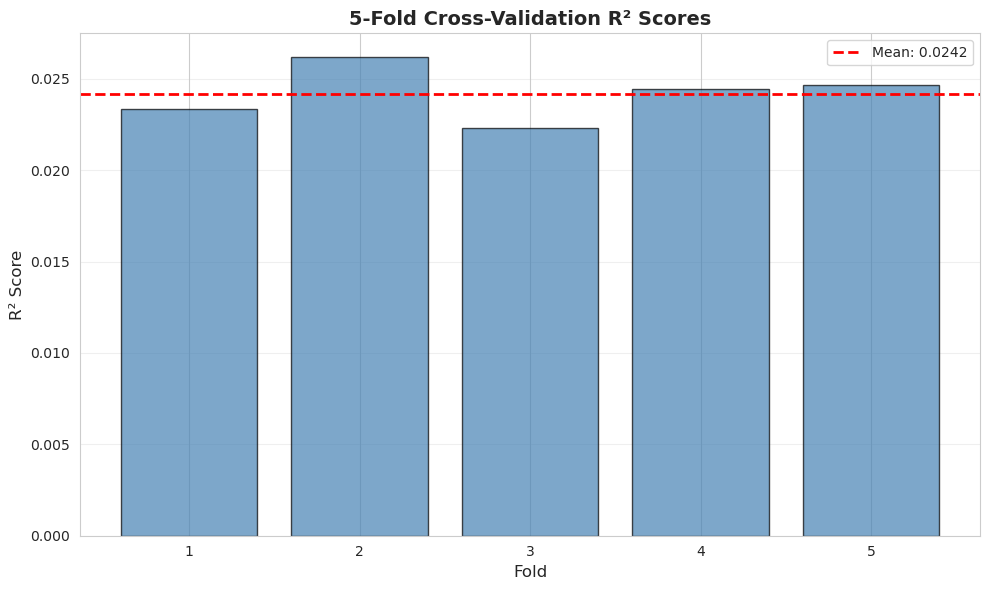

In [37]:
# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores, color='steelblue', alpha=0.7, edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.4f}', linewidth=2)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('5-Fold Cross-Validation R² Scores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 9. Residual Analysis

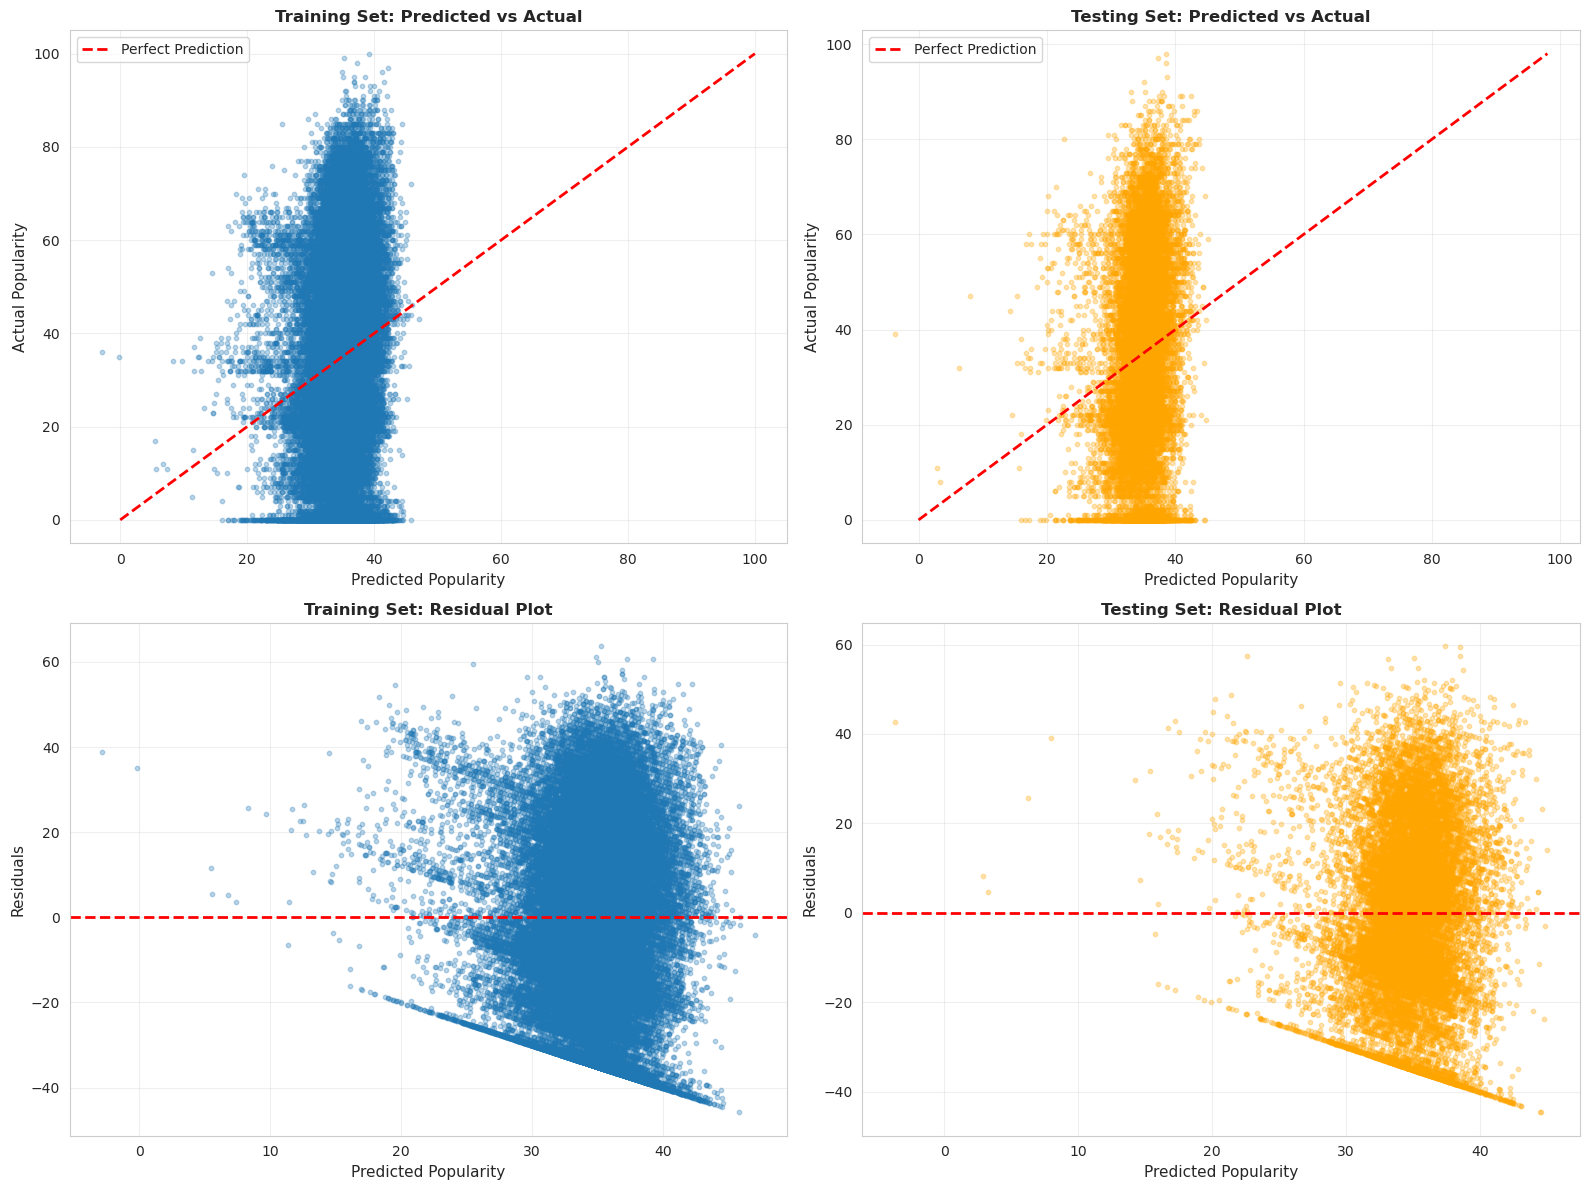

In [40]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Residual plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Predicted vs Actual (Training)
axes[0, 0].scatter(y_train_pred, y_train, alpha=0.3, s=10)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Predicted Popularity', fontsize=11)
axes[0, 0].set_ylabel('Actual Popularity', fontsize=11)
axes[0, 0].set_title('Training Set: Predicted vs Actual', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Predicted vs Actual (Testing)
axes[0, 1].scatter(y_test_pred, y_test, alpha=0.3, s=10, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Predicted Popularity', fontsize=11)
axes[0, 1].set_ylabel('Actual Popularity', fontsize=11)
axes[0, 1].set_title('Testing Set: Predicted vs Actual', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Residual plot (Training)
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.3, s=10)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Popularity', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title('Training Set: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Residual plot (Testing)
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.3, s=10, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Popularity', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title('Testing Set: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

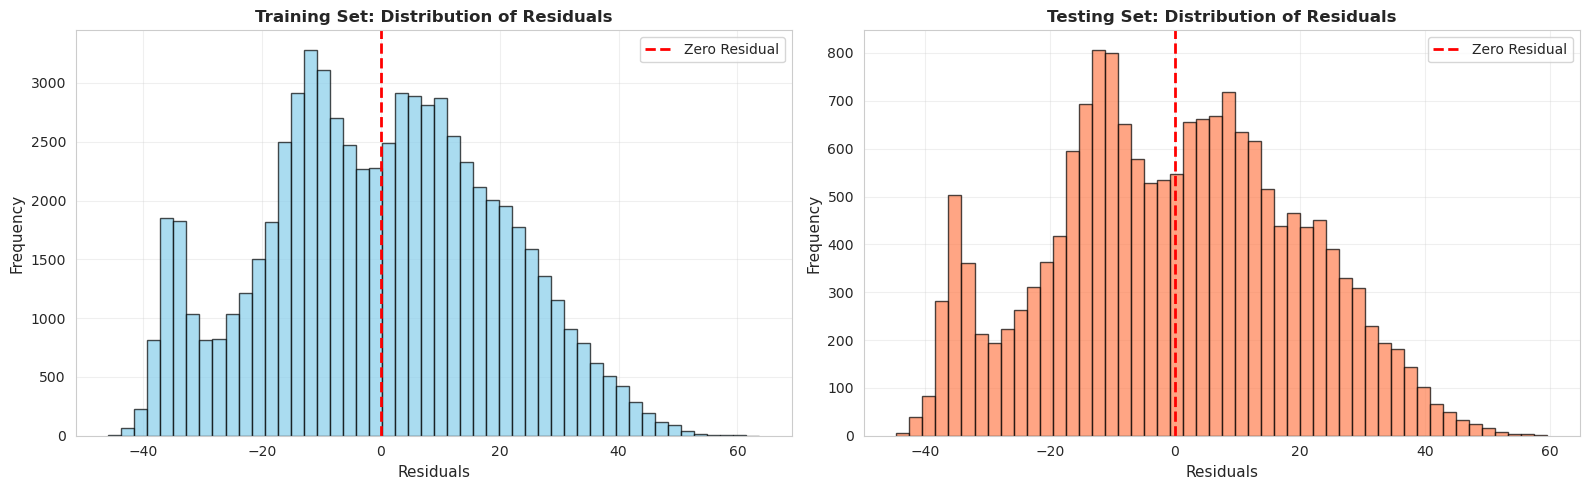

Training Residuals - Mean: -0.0000, Std: 19.5920
Testing Residuals - Mean: -0.1158, Std: 19.6580


In [47]:
# Distribution of residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Training residuals
axes[0].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
axes[0].set_xlabel('Residuals', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Training Set: Distribution of Residuals', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Testing residuals
axes[1].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
axes[1].set_xlabel('Residuals', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Testing Set: Distribution of Residuals', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Training Residuals - Mean: {train_residuals.mean():.4f}, Std: {train_residuals.std():.4f}")
print(f"Testing Residuals - Mean: {test_residuals.mean():.4f}, Std: {test_residuals.std():.4f}")

## 10. Making Predictions on New Data

In [51]:
# Example: Create sample data for prediction
sample_data = pd.DataFrame({
    'danceability': [0.7, 0.5, 0.8],
    'energy': [0.8, 0.6, 0.9],
    'valence': [0.6, 0.4, 0.8],
    'tempo': [120, 100, 140],
    'loudness': [-5, -8, -4],
    'duration_min': [3.5, 4.0, 2.8],
    'explicit': [1, 0, 1]
})

print("Sample tracks for prediction:")
print(sample_data)

# Scale the sample data
sample_data_scaled = scaler.transform(sample_data)

# Make predictions
sample_predictions = lr_model.predict(sample_data_scaled)

# Display predictions
sample_data['Predicted_Popularity'] = sample_predictions.round(2)
print("\nPredicted popularity scores:")
print(sample_data[['danceability', 'energy', 'valence', 'Predicted_Popularity']])

Sample tracks for prediction:
   danceability  energy  valence  tempo  loudness  duration_min  explicit
0           0.7     0.8      0.6    120        -5           3.5         1
1           0.5     0.6      0.4    100        -8           4.0         0
2           0.8     0.9      0.8    140        -4           2.8         1

Predicted popularity scores:
   danceability  energy  valence  Predicted_Popularity
0           0.7     0.8      0.6                 39.02
1           0.5     0.6      0.4                 34.78
2           0.8     0.9      0.8                 39.06


## 11. Model Summary and Insights

In [57]:
print("="*70)
print("LINEAR REGRESSION MODEL SUMMARY")
print("="*70)

print(f"\n📊 Dataset Information:")
print(f"   Total samples: {len(df_clean):,}")
print(f"   Training samples: {len(X_train):,}")
print(f"   Testing samples: {len(X_test):,}")
print(f"   Number of features: {len(feature_columns)}")

print(f"\n📈 Model Performance:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score: {test_r2:.4f}")
print(f"   Testing RMSE: {test_rmse:.4f}")
print(f"   Testing MAE: {test_mae:.4f}")

print(f"\n🔍 Cross-Validation:")
print(f"   Mean CV R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print(f"\n🎯 Top 3 Most Important Features (by absolute coefficient):")
top_features = coef_df.head(3)
for idx, row in top_features.iterrows():
    print(f"   {row['Feature']:15s}: {row['Coefficient']:8.4f}")

print(f"\n💡 Key Insights:")
if test_r2 > 0.5:
    print(f"   ✓ The model explains {test_r2*100:.1f}% of the variance in track popularity")
else:
    print(f"   ⚠ The model explains only {test_r2*100:.1f}% of the variance - moderate predictive power")

if abs(train_r2 - test_r2) < 0.05:
    print(f"   ✓ Good generalization - minimal overfitting detected")
else:
    print(f"   ⚠ Some overfitting detected (train-test R² gap: {abs(train_r2-test_r2):.4f})")

print(f"   ✓ Average prediction error: {test_mae:.2f} popularity points")

print("\n" + "="*70)

LINEAR REGRESSION MODEL SUMMARY

📊 Dataset Information:
   Total samples: 86,706
   Training samples: 69,364
   Testing samples: 17,342
   Number of features: 7

📈 Model Performance:
   Training R² Score: 0.0245
   Testing R² Score: 0.0262
   Testing RMSE: 19.6577
   Testing MAE: 16.2857

🔍 Cross-Validation:
   Mean CV R² Score: 0.0242 (+/- 0.0026)

🎯 Top 3 Most Important Features (by absolute coefficient):
   loudness       :   3.5104
   energy         :  -2.5732
   danceability   :   1.3324

💡 Key Insights:
   ⚠ The model explains only 2.6% of the variance - moderate predictive power
   ✓ Good generalization - minimal overfitting detected
   ✓ Average prediction error: 16.29 popularity points



## 12. Save Model and Results

In [54]:
# Save predictions to CSV
results_df = pd.DataFrame({
    'Actual_Popularity': y_test.values,
    'Predicted_Popularity': y_test_pred,
    'Residual': test_residuals
})

results_df.to_csv('spotify_predictions.csv', index=False)
print("✓ Predictions saved to 'spotify_predictions.csv'")

# Save model summary
with open('model_summary.txt', 'w') as f:
    f.write("Spotify Linear Regression Model Summary\n")
    f.write("="*50 + "\n\n")
    f.write(f"Training R² Score: {train_r2:.4f}\n")
    f.write(f"Testing R² Score: {test_r2:.4f}\n")
    f.write(f"Testing RMSE: {test_rmse:.4f}\n")
    f.write(f"Testing MAE: {test_mae:.4f}\n\n")
    f.write("Feature Coefficients:\n")
    for feature, coef in zip(feature_columns, lr_model.coef_):
        f.write(f"  {feature:15s}: {coef:8.4f}\n")

print("✓ Model summary saved to 'model_summary.txt'")

✓ Predictions saved to 'spotify_predictions.csv'
✓ Model summary saved to 'model_summary.txt'


## Conclusion

This notebook has successfully:
1. ✅ Loaded and explored the Spotify tracks dataset
2. ✅ Performed comprehensive exploratory data analysis
3. ✅ Built a linear regression model using specified audio features
4. ✅ Validated the model using multiple metrics and cross-validation
5. ✅ Made predictions and analyzed residuals
6. ✅ Identified key features influencing track popularity

The model provides insights into how audio features and metadata relate to track popularity on Spotify.